In [1]:
import urllib.request
from bs4 import BeautifulSoup as soup
import requests
import re
import pandas as pd
import dataframe_image as dfi
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

rallyname = 'Molon Labe'
raceDate = '31/03/2024'
surface = 'Gravel'
competition = 'Cup'

link = 'https://www.ewrc-results.com/results/88517-rally-sprint-molon-lave-2024/?s='
startat, no_ss=455879, int(3)
canceled = []

stages = [number for number in range(no_ss)]


rally_23 = []

In [2]:
if canceled:
    for j in canceled: stages.remove(j-1)
#print(stages)


In [3]:
for ss in range(0,(no_ss)):
    val= startat + ss
    ss_a = str(val)
    my_url11 = link + ss_a
    #print(my_url11)
    req = urllib.request.Request(my_url11, headers={'User-Agent': 'Mozilla/5.0'})
    uClient11 = urllib.request.urlopen(req)
    page_html11 = uClient11.read()
    uClient11.close()
    data = pd.read_html(page_html11)[0]
    data.columns=['Pos.', 'No', 'Crew', 'Gr/Cl','ss_time', 'Diff', 'Speed']
    data['ss']=ss+1
    equal = '=' in data['Pos.'].unique()
    if equal:
        data['Pos.'] = data['Pos.'].replace('=', method='ffill')
        data['Pos.'] = data['Pos.'].astype(str).astype(float)
    #print(data.dtypes)
    #print(data)
    rally_23.append(data) 

In [4]:
rally2023_stages = pd.concat(rally_23, axis=0)

In [5]:
rally2023_stages = pd.concat(rally_23, axis=0)
rally2023_stages['Pos.'] = rally2023_stages['Pos.'].astype(int)
#rally2023_stages['No'] = rally2023_stages['No.'].str[1:]
#rally2023_stages.to_csv('03_rally2023.csv', index=False)
rally2023_stages = rally2023_stages.fillna("-")
rally2023_stages = rally2023_stages.rename(columns={'Driver / Co-driver Vehicle': "Crew"})
rally2023_stages['Race'] = rallyname
rally2023_stages['date'] = raceDate
rally2023_stages['surface'] = surface
rally2023_stages['competition'] = competition
rally2023_stages['Crew'] = rally2023_stages['Crew'].str[:14]
rally2023_stages = rally2023_stages.sort_values(by=['Race', 'ss'])
rally2023_stages['cou']= rally2023_stages.groupby(['Race', 'ss']).cumcount()+1
rally2023_stages

,Pos.,No,Crew,Gr/Cl,ss_time,Diff,Speed,ss,Race,date,surface,competition,cou
0,1,#1,Papadimitriou,C1,9:09.65,-,77.5,1,Molon Labe,31/03/2024,Gravel,Cup,1
1,2,#3,Paradissis P.,C2,9:30.66,+21.01 + 21.01,74.6 1.78,1,Molon Labe,31/03/2024,Gravel,Cup,2
2,3,#7,Vigopoulos Nik,C2,9:34.15,+24.50 + 3.49,74.2 2.07,1,Molon Labe,31/03/2024,Gravel,Cup,3
3,4,#10,Tzemos K. - A,C2,9:48.64,+38.99 + 14.49,72.3 3.30,1,Molon Labe,31/03/2024,Gravel,Cup,4
4,5,#12,Tsetsonis Elia,C2,9:52.25,+42.60 + 3.61,71.9 3.60,1,Molon Labe,31/03/2024,Gravel,Cup,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39,40,#123,Palapanoglou I,2,12:28.16,+3:30.91 + 0.80,56.9 17.8,3,Molon Labe,31/03/2024,Gravel,Cup,40
40,41,#115,Papandreou A.,3,12:46.76,+3:49.51 + 18.60,55.5 19.4,3,Molon Labe,31/03/2024,Gravel,Cup,41
41,42,#122,Votzakis Pavlo,2,12:59.45,+4:02.20 + 12.69,54.6 20.5,3,Molon Labe,31/03/2024,Gravel,Cup,42
42,43,#116,Kansos Patrokl,4,13:43.22,+4:45.97 + 43.77,51.7 24.2,3,Molon Labe,31/03/2024,Gravel,Cup,43


In [6]:
rally2023_stageClass=rally2023_stages.drop(['No', 'Diff', 'Speed', 'ss_time', 'cou', 'date', 'surface', 'competition'], axis=1)
rally2023_stageTimes=rally2023_stages.drop(['No', 'Diff', 'Speed', 'cou', 'date', 'surface', 'competition', 'Pos.'], axis=1)
rally2023_stageClass['Pos.'] = rally2023_stageClass['Pos.'].astype(str)
rally2023_ClassView = rally2023_stageClass.set_index(['Crew','Gr/Cl','ss','Race'], drop=True).unstack('ss')
rally2023_TimeView = rally2023_stageTimes.set_index(['Crew','Gr/Cl', 'ss', 'Race'], drop=True).unstack('ss')
rally2023_ClassView = rally2023_ClassView.fillna("-")
rally2023_TimeView = rally2023_TimeView.fillna("-")
#rally2023_stageClass2 = rally2023_stageClass.loc[((rally2023_stageClass['Group'] == 'RC1') | (rally2023_stageClass['Group'] == 'RC2'))] 
#rally2023_ClassView2 = rally2023_stageClass2.set_index(['No','Crew','Group','ss', 'Race'], drop=True).unstack('ss')
#rally2023_ClassView2 = rally2023_ClassView2.fillna("-")

In [7]:
rally2023_ClassView.to_csv(str(rallyname) +'_Stages_Classification.csv')
rally2023_TimeView.to_csv(str(rallyname) + '_Stages_Times.csv')

In [8]:
pd.set_option("display.max_columns", None)

dfi.export(rally2023_ClassView, (str(rallyname) + '_Stages_Classification.jpg'))


In [9]:
rally2023_stages[['time_mm','time_ss']] = rally2023_stages['ss_time'].str.split(':', expand=True)
#rally2023_stages['time_hh']= rally2023_stages['time_hh'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_mm']= rally2023_stages['time_mm'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_ss']= pd.to_numeric(rally2023_stages['time_ss'], errors='coerce')
rally2023_stages['time_SS_sec'] = rally2023_stages['time_mm']*60 + rally2023_stages['time_ss']
rally2023_stages = rally2023_stages.drop(['Pos.', 'No', 'ss_time', 'Diff',  'Speed', 'time_mm', 'time_ss'], axis=1)
rally2023_stages.to_csv(str(rallyname) + '_Stages_Times_Sec.csv',index=False)
rally2023_stages


,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec
0,Papadimitriou,C1,1,Molon Labe,31/03/2024,Gravel,Cup,1,549.65
1,Paradissis P.,C2,1,Molon Labe,31/03/2024,Gravel,Cup,2,570.66
2,Vigopoulos Nik,C2,1,Molon Labe,31/03/2024,Gravel,Cup,3,574.15
3,Tzemos K. - A,C2,1,Molon Labe,31/03/2024,Gravel,Cup,4,588.64
4,Tsetsonis Elia,C2,1,Molon Labe,31/03/2024,Gravel,Cup,5,592.25
...,...,...,...,...,...,...,...,...,...
39,Palapanoglou I,2,3,Molon Labe,31/03/2024,Gravel,Cup,40,748.16
40,Papandreou A.,3,3,Molon Labe,31/03/2024,Gravel,Cup,41,766.76
41,Votzakis Pavlo,2,3,Molon Labe,31/03/2024,Gravel,Cup,42,779.45
42,Kansos Patrokl,4,3,Molon Labe,31/03/2024,Gravel,Cup,43,823.22


In [10]:
min_value = rally2023_stages.groupby(['Race', 'ss'])['time_SS_sec'].min()
#min_value = pd.DataFrame(min_value)

min_value2 =  pd.DataFrame(min_value)

min_value2 = min_value2.rename(columns={'time_SS_sec' : 'min_time'})
min_value2

min_time
Race       ss          
Molon Labe 1     549.65
           2     537.82
           3     537.25

In [11]:
ss_times_F = rally2023_stages.merge(min_value2, on=['Race', 'ss'])
ss_times_F['diff']=ss_times_F['time_SS_sec'] - ss_times_F['min_time']
ss_times_F['diff%']=(ss_times_F['time_SS_sec'] - ss_times_F['min_time'])/ss_times_F['min_time']*100
ss_times_F['SS.']=ss_times_F['ss'].apply(lambda x: '{0:0>2}'.format(x))
ss_times_F

,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec,min_time,diff,diff%,SS.
0,Papadimitriou,C1,1,Molon Labe,31/03/2024,Gravel,Cup,1,549.65,549.65,0.00,0.000000,01
1,Paradissis P.,C2,1,Molon Labe,31/03/2024,Gravel,Cup,2,570.66,549.65,21.01,3.822432,01
2,Vigopoulos Nik,C2,1,Molon Labe,31/03/2024,Gravel,Cup,3,574.15,549.65,24.50,4.457382,01
3,Tzemos K. - A,C2,1,Molon Labe,31/03/2024,Gravel,Cup,4,588.64,549.65,38.99,7.093605,01
4,Tsetsonis Elia,C2,1,Molon Labe,31/03/2024,Gravel,Cup,5,592.25,549.65,42.60,7.750387,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,Palapanoglou I,2,3,Molon Labe,31/03/2024,Gravel,Cup,40,748.16,537.25,210.91,39.257329,03
147,Papandreou A.,3,3,Molon Labe,31/03/2024,Gravel,Cup,41,766.76,537.25,229.51,42.719404,03
148,Votzakis Pavlo,2,3,Molon Labe,31/03/2024,Gravel,Cup,42,779.45,537.25,242.20,45.081433,03
149,Kansos Patrokl,4,3,Molon Labe,31/03/2024,Gravel,Cup,43,823.22,537.25,285.97,53.228478,03


In [12]:
#ss_times_C6 = ss_times_F[ss_times_F['Gr/Cl'].str.contains('|'.join(['C1', 'C2']))]
ss_times_C6 = ss_times_F
ss_times_C6

,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec,min_time,diff,diff%,SS.
0,Papadimitriou,C1,1,Molon Labe,31/03/2024,Gravel,Cup,1,549.65,549.65,0.00,0.000000,01
1,Paradissis P.,C2,1,Molon Labe,31/03/2024,Gravel,Cup,2,570.66,549.65,21.01,3.822432,01
2,Vigopoulos Nik,C2,1,Molon Labe,31/03/2024,Gravel,Cup,3,574.15,549.65,24.50,4.457382,01
3,Tzemos K. - A,C2,1,Molon Labe,31/03/2024,Gravel,Cup,4,588.64,549.65,38.99,7.093605,01
4,Tsetsonis Elia,C2,1,Molon Labe,31/03/2024,Gravel,Cup,5,592.25,549.65,42.60,7.750387,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,Palapanoglou I,2,3,Molon Labe,31/03/2024,Gravel,Cup,40,748.16,537.25,210.91,39.257329,03
147,Papandreou A.,3,3,Molon Labe,31/03/2024,Gravel,Cup,41,766.76,537.25,229.51,42.719404,03
148,Votzakis Pavlo,2,3,Molon Labe,31/03/2024,Gravel,Cup,42,779.45,537.25,242.20,45.081433,03
149,Kansos Patrokl,4,3,Molon Labe,31/03/2024,Gravel,Cup,43,823.22,537.25,285.97,53.228478,03


In [13]:
ss_times_F3 =ss_times_C6.drop(['Gr/Cl','time_SS_sec','cou', 'ss'], axis=1)
ss_times_F4 = pd.pivot_table(ss_times_F3, values='diff', 
                                index='Crew', 
                                columns=['Race', 'SS.'])
ss_times_F4

Race           Molon Labe                
SS.                    01      02      03
Crew                                     
Anastassopoulo    106.920     NaN     NaN
Athanassopoulo    145.870  147.70  154.78
Basdelis Andre    105.630  126.40     NaN
Basdelis Giorg    111.120  113.55     NaN
Bris Panagioti    137.720  138.39  142.75
Christodoulou      72.455   74.99   79.34
Christou Dimit    198.490  199.21  206.35
Davaris Nikos      98.900  104.97  118.63
Delaportas Gio     95.280   93.21  116.66
Dodos Giorgos     177.050  160.31  162.28
Edipidis Ioann     98.290   95.60     NaN
Flandy  - Gira     53.440   58.59   61.97
Giannakopoulos    100.100  161.78     NaN
Haidas Panagio    191.270  186.60  185.75
Ismailos Panos     45.770   38.22   40.44
Kalaitzian Ioa    212.300  135.02     NaN
Kalamaras Teo     197.570  175.78  165.60
Kansos Patrokl    775.300  242.62  285.97
Kassidopoulos     147.120  150.02  160.06
Kofinas Konsta    134.700  144.80  171.26
Kokkinos Steli    106.160  111.91  128.18
Manetas Giorgo     99.970  106.61  134.34
Mantas Panagio    158.000  164.86  183.67
Mastrogiannis    1010.830     NaN     NaN
Melas D.  - Va    105.300  111.02  106.62
Michalopoulos     131.730  139.48  159.36
Moustakas Spir    213.200  138.24     NaN
Nomikos Ioanni    191.460  176.26  206.45
Pafitis George     69.510  103.51   97.05
Palaiokostas D     98.940  109.44  101.23
Palapanoglou I    208.890  169.51  210.91
Papadimitriou       0.000    0.00    0.00
Papadopoulos A    116.720  112.71  119.77
Papandreou A.     163.070  195.23  229.51
Paradissis Gio     92.210  107.95  113.62
Paradissis P.      21.010   32.48   26.55
Paravalos I.      121.360  130.91  117.88
Pateas A.  - P    112.930  125.13     NaN
Pavli Marialen    168.640  151.10  177.62
Rigas Giorgos     102.650  105.94  128.85
Sotiropoulos N    107.770  106.35  121.70
Stafilopatis M     52.500   67.72   76.38
Stavropoulos D     62.160   51.21   60.99
Tsalamatas Ioa    100.230  119.28  123.22
Tsetsonis Elia     42.600   45.39   68.13
Tsoulos Argiri     50.100   56.46   66.34
Tzemos K.  - A     38.990   48.34   48.89
Tzilavis Savva    220.890  221.30  210.11
Vassilopoulos     135.090     NaN     NaN
Vigopoulos Nik     24.500   31.76   31.25
Vorrias Ioanni     89.170   98.60     NaN
Votzakis Pavlo    152.410  176.88  242.20
Yamalakis Stel    130.100  136.21  166.66
Zouras E.  - P    176.040  192.91  926.09

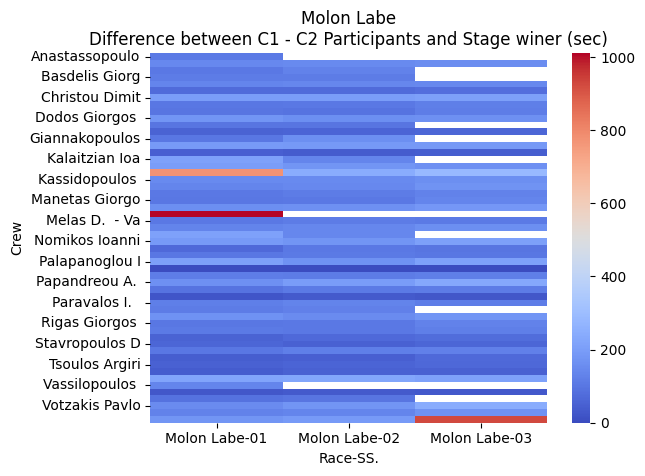

In [14]:
Heatmap_ALL = sns.heatmap(ss_times_F4, cmap='coolwarm')
plt.title(rallyname+'\nDifference between C1 - C2 Participants and Stage winer (sec)')
plt.savefig((rallyname) + "Heatmap_C1.png")

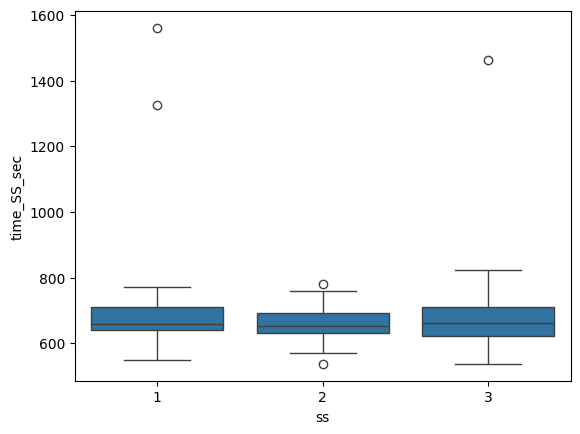

In [15]:
bplt=sns.boxplot( y=ss_times_C6["time_SS_sec"], x=ss_times_C6["ss"])

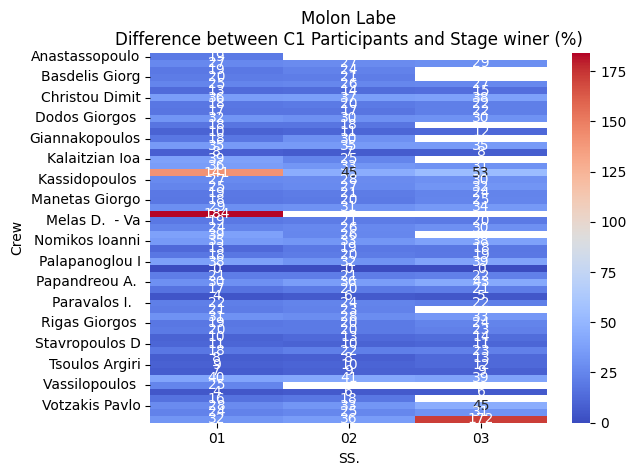

In [16]:
ss_timesa = pd.pivot_table(ss_times_C6, values='diff%', 
                                index='Crew', 
                                columns=['SS.'])
Heatmap_ = sns.heatmap(ss_timesa, annot=True, fmt=',.0f', cmap='coolwarm')
plt.title(rallyname +'\nDifference between C1 Participants and Stage winer (%)')
plt.savefig(rallyname + "C1.jpg")

In [17]:
Group = 'C'
ss_times_WRC2 = ss_times_F[ss_times_F['Gr/Cl'].str.contains('C6')]
ss_times_WRC = ss_times_F[ss_times_F['Gr/Cl'].str.contains('|'.join(['C1', 'C2', 'C3', 'C4', 'C5', 'C6']))]
ss_times_WRC

,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec,min_time,diff,diff%,SS.
0,Papadimitriou,C1,1,Molon Labe,31/03/2024,Gravel,Cup,1,549.65,549.65,0.00,0.000000,01
1,Paradissis P.,C2,1,Molon Labe,31/03/2024,Gravel,Cup,2,570.66,549.65,21.01,3.822432,01
2,Vigopoulos Nik,C2,1,Molon Labe,31/03/2024,Gravel,Cup,3,574.15,549.65,24.50,4.457382,01
3,Tzemos K. - A,C2,1,Molon Labe,31/03/2024,Gravel,Cup,4,588.64,549.65,38.99,7.093605,01
4,Tsetsonis Elia,C2,1,Molon Labe,31/03/2024,Gravel,Cup,5,592.25,549.65,42.60,7.750387,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,Michalopoulos,C6 F2,3,Molon Labe,31/03/2024,Gravel,Cup,28,696.61,537.25,159.36,29.662168,03
140,Pavli Marialen,C4 F2 E,3,Molon Labe,31/03/2024,Gravel,Cup,34,714.87,537.25,177.62,33.060959,03
141,Mantas Panagio,C6 F2,3,Molon Labe,31/03/2024,Gravel,Cup,35,720.92,537.25,183.67,34.187064,03
142,Haidas Panagio,C6 F2,3,Molon Labe,31/03/2024,Gravel,Cup,36,723.00,537.25,185.75,34.574221,03


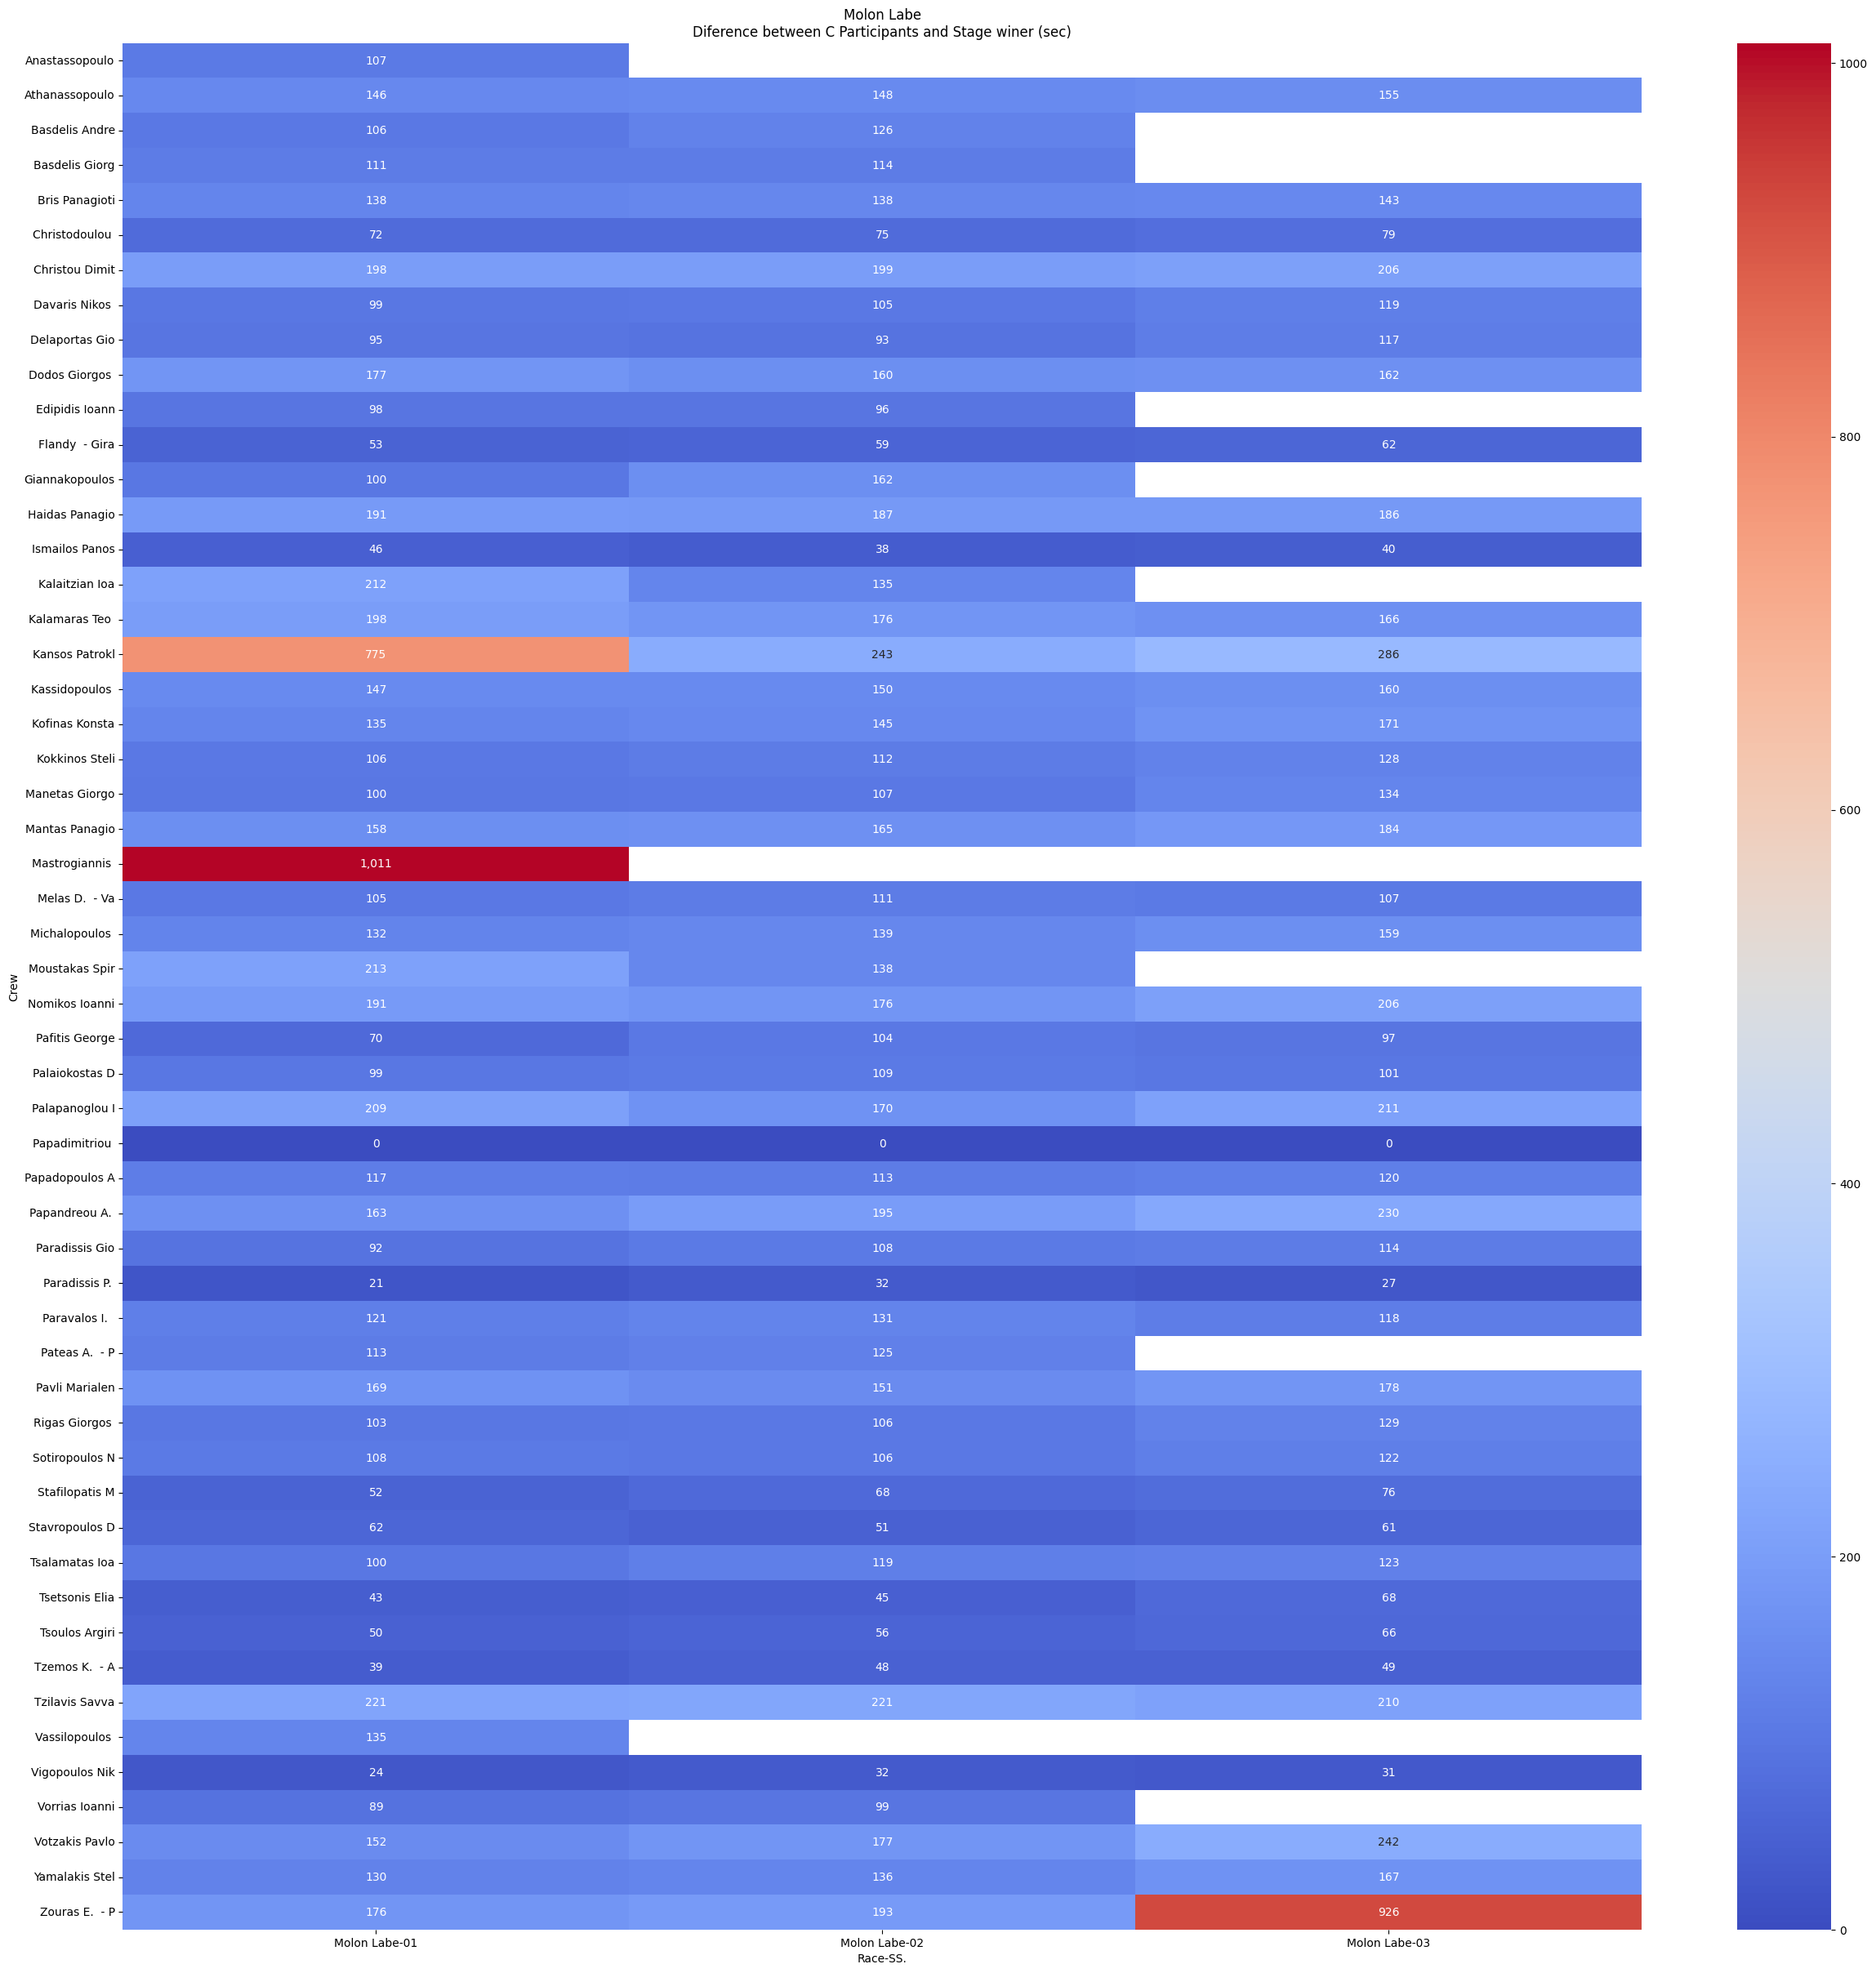

In [18]:
fig,ax = plt.subplots()
fig.set_size_inches(30,30)
Heatmap_ALL = sns.heatmap(ss_times_F4, annot=True, fmt=',.0f',cmap='coolwarm')
plt.title(rallyname+'\nDiference between '+ Group + ' Participants and Stage winer (sec)')
plt.savefig("Heatmap_" + Group + ".png")
plt.show()

In [19]:
ss_times_WRC2 = ss_times_WRC2.drop(['min_time','diff','diff%', 'cou'], axis=1)
ss_times_WRC2

,Crew,Gr/Cl,ss,Race,date,surface,competition,time_SS_sec,SS.
25,Kokkinos Steli,C6 F2,1,Molon Labe,31/03/2024,Gravel,Cup,655.81,01
27,Sotiropoulos N,C6 F2 E,1,Molon Labe,31/03/2024,Gravel,Cup,657.42,01
28,Basdelis Giorg,C6 F2,1,Molon Labe,31/03/2024,Gravel,Cup,660.77,01
29,Pateas A. - P,C6 F2,1,Molon Labe,31/03/2024,Gravel,Cup,662.58,01
33,Michalopoulos,C6 F2,1,Molon Labe,31/03/2024,Gravel,Cup,681.38,01
37,Athanassopoulo,C6 F2,1,Molon Labe,31/03/2024,Gravel,Cup,695.52,01
40,Mantas Panagio,C6 F2,1,Molon Labe,31/03/2024,Gravel,Cup,707.65,01
45,Haidas Panagio,C6 F2,1,Molon Labe,31/03/2024,Gravel,Cup,740.92,01
73,Sotiropoulos N,C6 F2 E,2,Molon Labe,31/03/2024,Gravel,Cup,644.17,02
78,Kokkinos Steli,C6 F2,2,Molon Labe,31/03/2024,Gravel,Cup,649.73,02


In [20]:
min_value = ss_times_WRC2.groupby(['Race', 'ss'])['time_SS_sec'].min()
#min_value = pd.DataFrame(min_value)

min_value2_C6 =  pd.DataFrame(min_value)

min_value2_C6 = min_value2_C6.rename(columns={'time_SS_sec' : 'min_time'})
min_value2_C6

min_time
Race       ss          
Molon Labe 1     655.81
           2     644.17
           3     658.95

In [21]:
ss_times_F2 = ss_times_WRC2.merge(min_value2_C6, on=['Race', 'ss'])
ss_times_F2['diff']=ss_times_F2['time_SS_sec'] - ss_times_F2['min_time']
ss_times_F2['diff%']=(ss_times_F2['time_SS_sec'] - ss_times_F2['min_time'])/ss_times_F['min_time']*100
ss_times_F2['SS.']=ss_times_F2['ss'].apply(lambda x: '{0:0>2}'.format(x))
ss_times_F2

,Crew,Gr/Cl,ss,Race,date,surface,competition,time_SS_sec,SS.,min_time,diff,diff%
0,Kokkinos Steli,C6 F2,1,Molon Labe,31/03/2024,Gravel,Cup,655.81,01,655.81,0.00,0.000000
1,Sotiropoulos N,C6 F2 E,1,Molon Labe,31/03/2024,Gravel,Cup,657.42,01,655.81,1.61,0.292914
2,Basdelis Giorg,C6 F2,1,Molon Labe,31/03/2024,Gravel,Cup,660.77,01,655.81,4.96,0.902392
3,Pateas A. - P,C6 F2,1,Molon Labe,31/03/2024,Gravel,Cup,662.58,01,655.81,6.77,1.231693
4,Michalopoulos,C6 F2,1,Molon Labe,31/03/2024,Gravel,Cup,681.38,01,655.81,25.57,4.652051
5,Athanassopoulo,C6 F2,1,Molon Labe,31/03/2024,Gravel,Cup,695.52,01,655.81,39.71,7.224597
6,Mantas Panagio,C6 F2,1,Molon Labe,31/03/2024,Gravel,Cup,707.65,01,655.81,51.84,9.431456
7,Haidas Panagio,C6 F2,1,Molon Labe,31/03/2024,Gravel,Cup,740.92,01,655.81,85.11,15.484399
8,Sotiropoulos N,C6 F2 E,2,Molon Labe,31/03/2024,Gravel,Cup,644.17,02,644.17,0.00,0.000000
9,Kokkinos Steli,C6 F2,2,Molon Labe,31/03/2024,Gravel,Cup,649.73,02,644.17,5.56,1.011553


In [22]:
ss_times_F3b =ss_times_F2.drop(['time_SS_sec', 'ss'], axis=1)
ss_times_F4b = pd.pivot_table(ss_times_F3b, values='diff%', index='Crew', columns=['SS.'])
ss_times_F4b = pd.pivot_table(ss_times_F3b, values='diff%', index='Crew', columns=['SS.'])
ss_times_F4b

SS.,01,02,03
Crew,,,
Athanassopoulo,7.224597,7.522969,6.018375
Basdelis Giorg,0.902392,1.309924,NaN
Haidas Panagio,15.484399,14.600200,11.652870
Kokkinos Steli,0.000000,1.011553,1.178932
Mantas Panagio,9.431456,10.644956,11.274447
Michalopoulos,4.652051,6.027472,6.851633
Pateas A. - P,1.231693,3.416720,NaN
Sotiropoulos N,0.292914,0.000000,0.000000


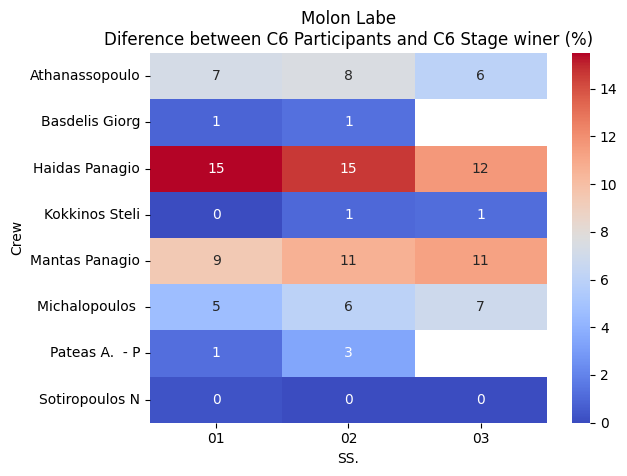

In [23]:
fig,ax = plt.subplots()
#fig.set_size_inches(30,30)
Heatmap_ALL = sns.heatmap(ss_times_F4b, annot=True, fmt=',.0f',cmap='coolwarm')
plt.title(rallyname+'\nDiference between C6 Participants and C6 Stage winer (%)')
plt.savefig("Heatmap_C6_Class.png")
plt.show()

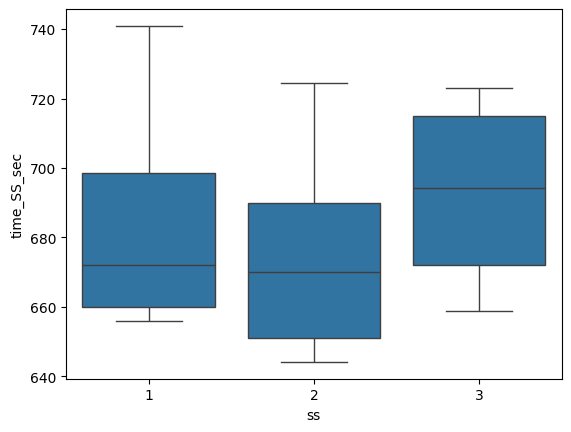

In [24]:
bplt=sns.boxplot( y=ss_times_F2["time_SS_sec"], x=ss_times_F2["ss"])